#### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense, Flatten,Layer, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras import Model
from keras.utils import np_utils
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential

#### Verifying the Image

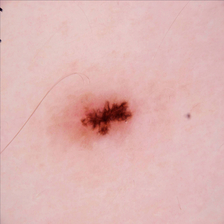

In [2]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/test/benign/1.jpg')
window_name = 'img'
cv2_imshow(img)

#### Benign Image dataset for training dataset

In [3]:
image_names = os.listdir('/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/train/benign')

#### Adding the Benign Images to the train dataset

In [4]:
X_train = []
y_train = []
for i in range(len(image_names)):
  try:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/train/benign/' + image_names[i])
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(0)
  except:
    pass

#### Malignant Image dataset for training dataset

In [5]:
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/train/malignant")

#### Adding the Malignant Images to the train dataset

In [6]:
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/train/malignant/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(1)
  except:
    pass

#### Checking the training dataset

In [7]:
print(X_train[0], y_train[0])

[[[149 119 192]
  [155 117 193]
  [157 118 196]
  ...
  [142  94 190]
  [144  99 192]
  [139  96 193]]

 [[153 120 195]
  [157 118 196]
  [154 117 197]
  ...
  [146  97 195]
  [143  97 193]
  [140  98 193]]

 [[153 120 195]
  [152 121 196]
  [151 112 198]
  ...
  [147  96 193]
  [142  97 190]
  [147 104 195]]

 ...

 [[135 107 183]
  [133 104 183]
  [136 107 186]
  ...
  [154 127 193]
  [149 125 190]
  [147 124 192]]

 [[141 111 186]
  [139 109 185]
  [138 108 184]
  ...
  [153 127 197]
  [147 124 192]
  [148 124 194]]

 [[137 113 185]
  [138 111 185]
  [134 106 182]
  ...
  [152 123 196]
  [147 124 192]
  [149 124 192]]] 0


#### Adding the Benign Images to the test dataset

In [8]:
X_test = []
y_test = []
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/test/benign")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/test/benign/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(0)
  except:
    pass

#### Adding the Malignant Images to the test dataset

In [9]:
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/test/malignant")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Skin Cancer Detection/Skin Cancer Data/test/malignant/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(1)
  except:
    pass

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Normalizaton

In [12]:
X_train = X_train/255
X_test = X_test/255

#### Checking the test dataset

In [13]:
print(X_train[0], X_test[0])

[[[0.58431373 0.46666667 0.75294118]
  [0.60784314 0.45882353 0.75686275]
  [0.61568627 0.4627451  0.76862745]
  ...
  [0.55686275 0.36862745 0.74509804]
  [0.56470588 0.38823529 0.75294118]
  [0.54509804 0.37647059 0.75686275]]

 [[0.6        0.47058824 0.76470588]
  [0.61568627 0.4627451  0.76862745]
  [0.60392157 0.45882353 0.77254902]
  ...
  [0.57254902 0.38039216 0.76470588]
  [0.56078431 0.38039216 0.75686275]
  [0.54901961 0.38431373 0.75686275]]

 [[0.6        0.47058824 0.76470588]
  [0.59607843 0.4745098  0.76862745]
  [0.59215686 0.43921569 0.77647059]
  ...
  [0.57647059 0.37647059 0.75686275]
  [0.55686275 0.38039216 0.74509804]
  [0.57647059 0.40784314 0.76470588]]

 ...

 [[0.52941176 0.41960784 0.71764706]
  [0.52156863 0.40784314 0.71764706]
  [0.53333333 0.41960784 0.72941176]
  ...
  [0.60392157 0.49803922 0.75686275]
  [0.58431373 0.49019608 0.74509804]
  [0.57647059 0.48627451 0.75294118]]

 [[0.55294118 0.43529412 0.72941176]
  [0.54509804 0.42745098 0.7254902 ]


#### Checking the shape of the train and test dataset

In [14]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(2637, 224, 224, 3) (660, 224, 224, 3) (2637,) (660,)


In [15]:
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [16]:
print(y_train.shape,y_test.shape)

(2637, 2) (660, 2)


#### Model Building

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

#### Model Summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                12616736  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 12,617,698
Trainable params: 12,617,698
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

#### Training the Dataset

In [23]:
    model.fit(X_train, y_train, batch_size = 100, epochs = 10 )

Epoch 1/10
27/27 [==============================] - 2s 72ms/step - loss: 0.2877 - accuracy: 0.8711
Epoch 2/10
27/27 [==============================] - 2s 70ms/step - loss: 0.2809 - accuracy: 0.8802
Epoch 3/10
27/27 [==============================] - 2s 70ms/step - loss: 0.2601 - accuracy: 0.8889
Epoch 4/10
27/27 [==============================] - 2s 71ms/step - loss: 0.2609 - accuracy: 0.8870
Epoch 5/10
27/27 [==============================] - 2s 69ms/step - loss: 0.2468 - accuracy: 0.9037
Epoch 6/10
27/27 [==============================] - 2s 71ms/step - loss: 0.2252 - accuracy: 0.9128
Epoch 7/10
27/27 [==============================] - 2s 71ms/step - loss: 0.2133 - accuracy: 0.9230
Epoch 8/10
27/27 [==============================] - 2s 71ms/step - loss: 0.2375 - accuracy: 0.9025
Epoch 9/10
27/27 [==============================] - 2s 72ms/step - loss: 0.2007 - accuracy: 0.9329
Epoch 10/10
27/27 [==============================] - 2s 69ms/step - loss: 0.1835 - accuracy: 0.9412


#### Checking the Accuracy for Test dataset

In [24]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 16ms/step - loss: 0.3394 - accuracy: 0.8379


[0.33936285972595215, 0.8378787636756897]